<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Heart_Disease_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying PCA on Heart Disease dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
heart = pd.read_csv('./heart_d.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Check and cleaning dataset

In [3]:
heart.shape

(303, 14)

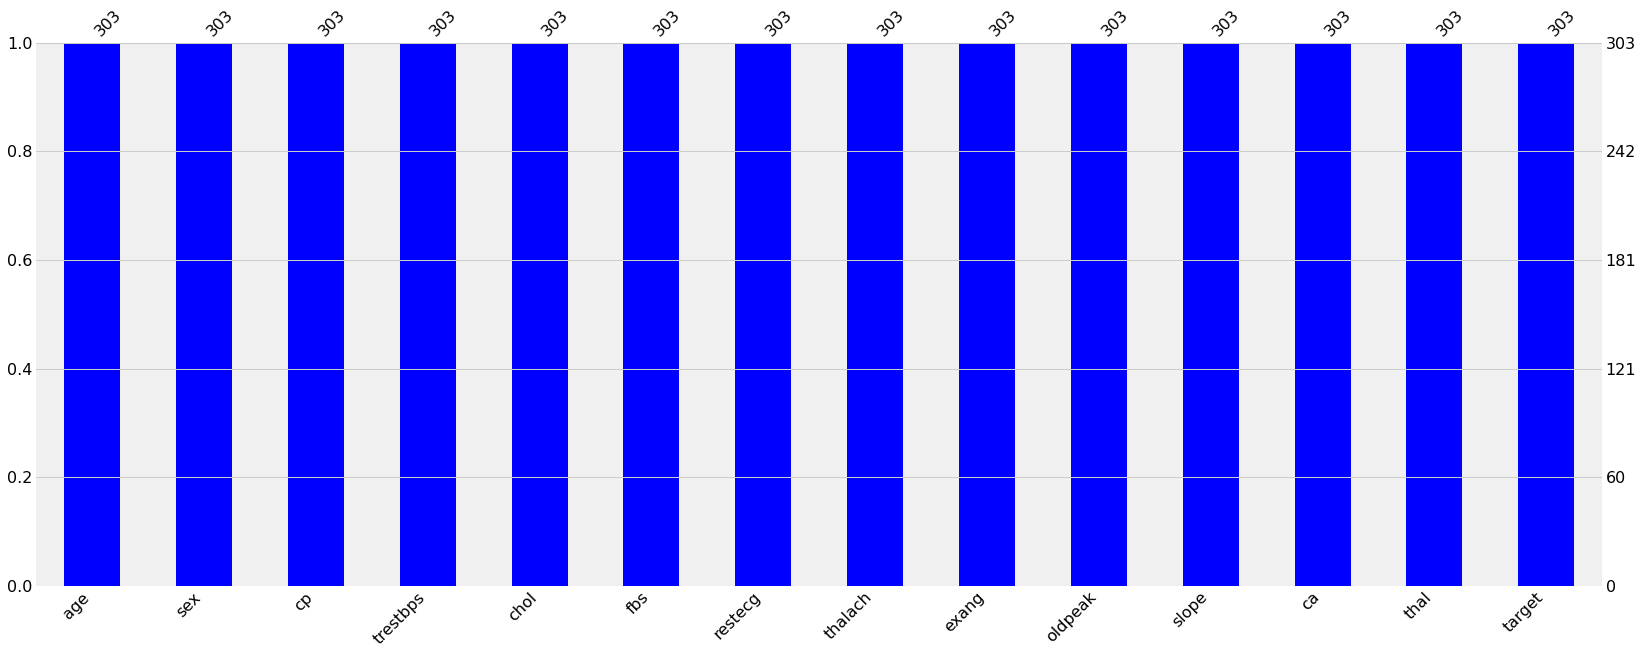

In [4]:
msno.bar(heart, color='b')

In [5]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data, target = heart.drop(columns=['target']), heart.target

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

# Performing the PCA

## Reducing the features

Text(0, 0.5, 'cummulative explained variance')

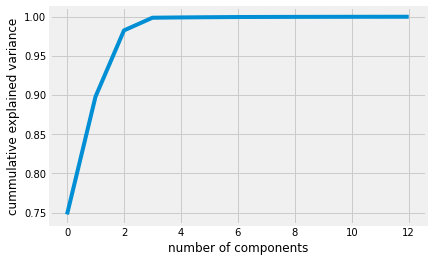

In [10]:
# Choosing the number of components

from sklearn.decomposition import PCA

pca = PCA()
pca_fit = pca.fit(data)

plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')

In [11]:
np.cumsum(pca_fit.explained_variance_ratio_)

array([0.7475642 , 0.89793442, 0.98253127, 0.99874723, 0.99913131,
       0.99941255, 0.99964154, 0.99974137, 0.99981859, 0.99987733,
       0.99992762, 0.99996859, 1.        ])

In [12]:
pca_lst = ['PC1', 'PC2', 'PC3', 'PC4']

pca_modified = PCA(n_components=4)

X_pca = pca_modified.fit_transform(data)
X_pca = pd.DataFrame(X_pca, columns=pca_lst)
X_pca.head()

,PC1,PC2,PC3,PC4
0,-12.267345,2.873838,14.969879,6.892940
1,2.690137,-39.871374,0.877882,-10.583598
2,-42.950214,-23.636820,1.759446,-7.786655
3,-10.944756,-28.438036,-7.044180,8.328134
4,106.979053,-15.874468,-14.861575,3.223808


In [13]:
# Concatenate the target with the new dataframe X_pca
heart_pca = pd.concat([X_pca, target], axis=1)
heart_pca.head()

,PC1,PC2,PC3,PC4,target
0,-12.267345,2.873838,14.969879,6.892940,1
1,2.690137,-39.871374,0.877882,-10.583598,1
2,-42.950214,-23.636820,1.759446,-7.786655,1
3,-10.944756,-28.438036,-7.044180,8.328134,1
4,106.979053,-15.874468,-14.861575,3.223808,1
